# Supervised Machine Learning

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

## Part I : Exploratory Data Analysis (EDA)

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [57]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [58]:
diabetes_df = pd.read_csv("C:/Downloads/Chrome/DS/Git/ML-Project-Supervised-Learning-LHL/Data/diabetes.csv")

In [59]:
display(diabetes_df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
print('rows, columns =', diabetes_df.shape,'\n')
diabetes_df.info()

rows, columns = (768, 9) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### Checking for missing or null values.

In [61]:
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

##### Upon further examination, it becomes evident that the 'Outcome' variable is binary, represented as either 'True' or 'False' (1 for individuals with diabetes and 0 for those without diabetes). This binary variable will serve as our dependent/target variable for the machine learning model.

#### Pairwise Plot

<Figure size 1200x800 with 0 Axes>

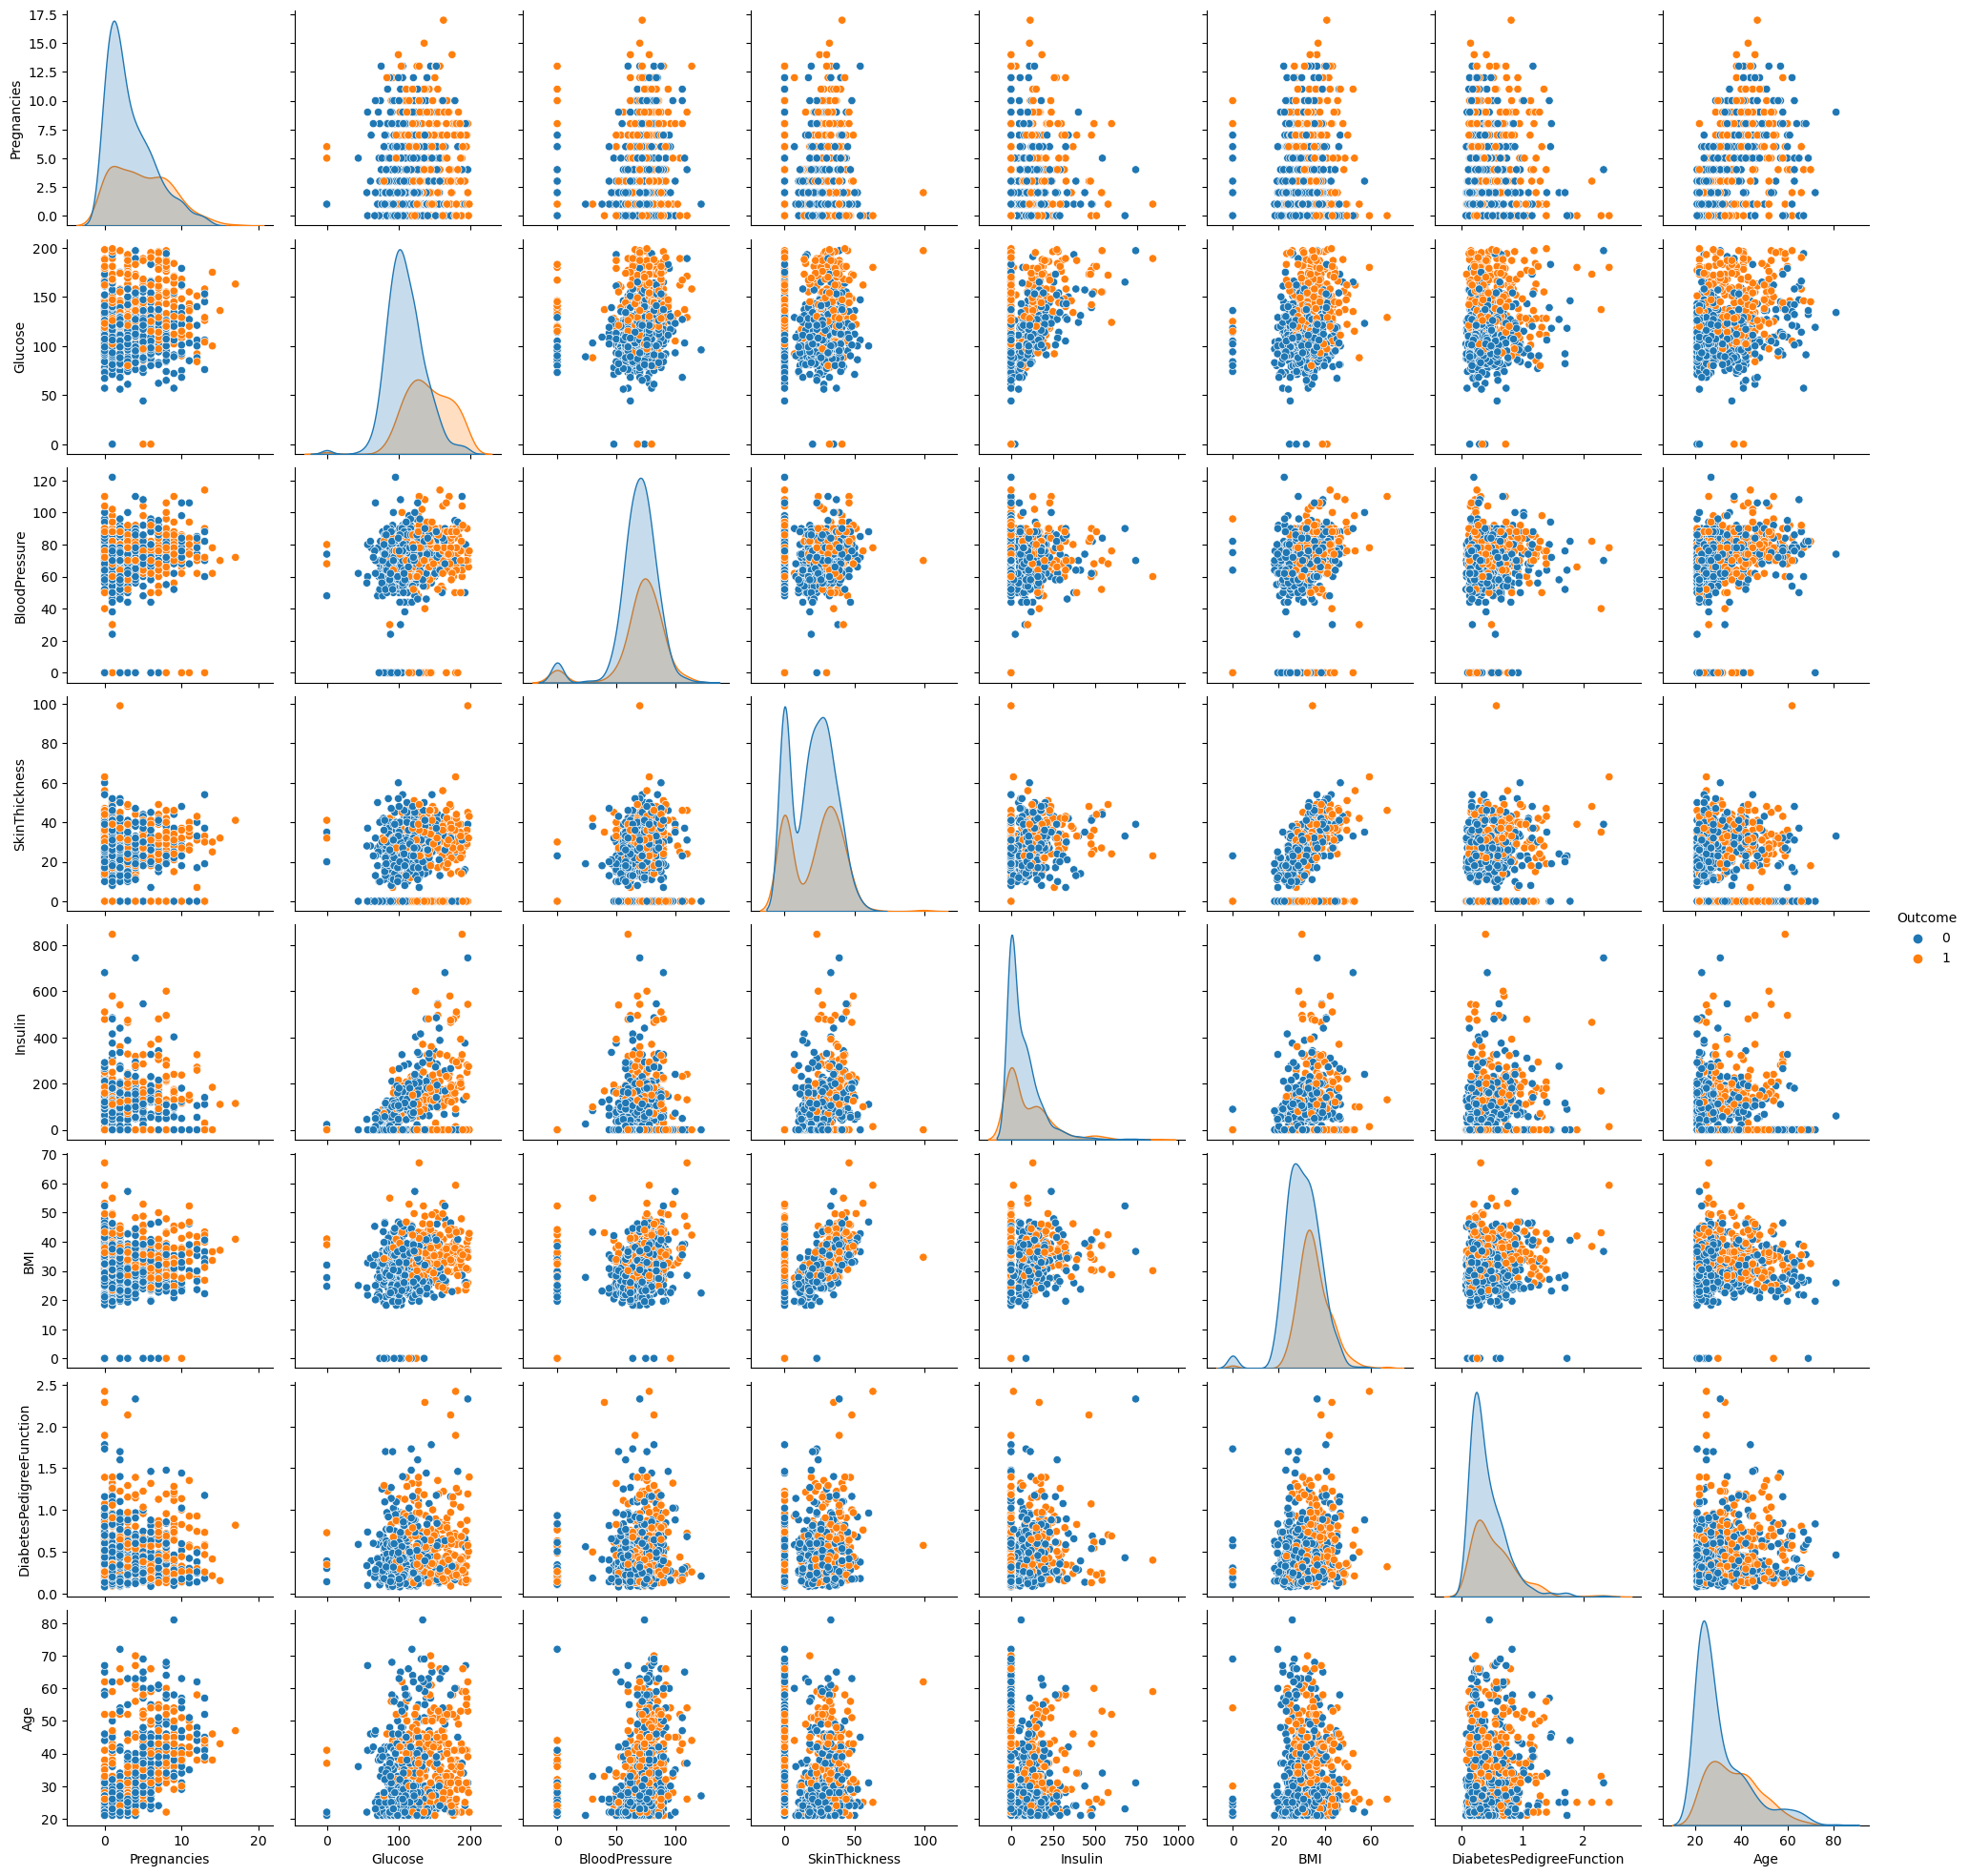

In [62]:
# Visualizing the relationship between predictor variables and the 'Outcome' variable
plt.figure(figsize=(12, 8))  # Set the overall size of the figure containing the subplots
# Create a pairplot with different colors for 'Outcome' and kernel density estimation plots on the diagonal
sns.pairplot(diabetes_df, hue='Outcome', diag_kind='kde')
plt.show()

#### Correlation Matrix for Predictor Variables

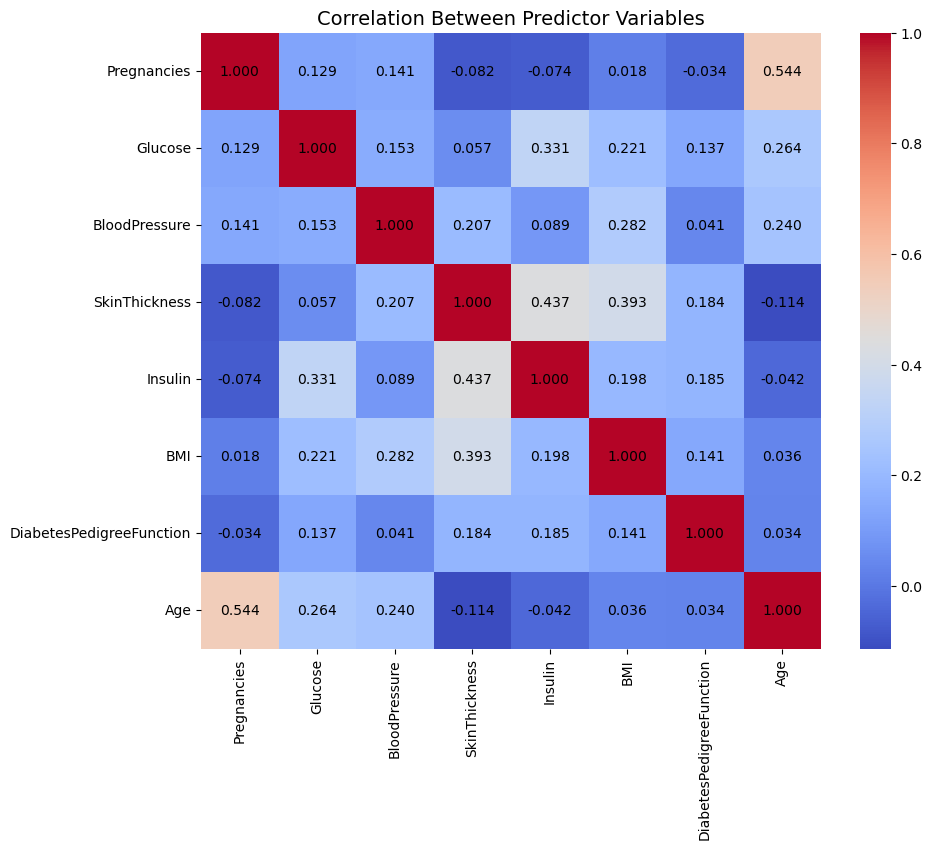

In [63]:
# Calculate the correlation matrix for the predictor variables to provide a graphical representation of data with color-coded values
predictor_corr_matrix = diabetes_df.drop('Outcome', axis=1).corr()

plt.figure(figsize=(10, 8))
ax = sns.heatmap(predictor_corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Between Predictor Variables', fontsize=14)  # Set the title and its size

# Display the correlation values in each cell by looping through each row and column
for i in range(predictor_corr_matrix.shape[0]):
    for j in range(predictor_corr_matrix.shape[1]):
        text = "{:.3f}".format(predictor_corr_matrix.iloc[i, j])  # Use .iloc to access elements
        # Display the values (considered as text) based on (x, y) coordinates and align them in the center
        ax.text(j + 0.5, i + 0.5, text, ha='center', va='center', fontsize=10)

plt.show()

#### The correlation coefficient is assessed on a scale ranging from -1 to +1, and we can interpret the results as follows:

- 1.00: Represents a perfect correlation.
- 0.80 to 0.99: Indicates a very strong correlation.
- 0.60 to 0.79: Suggests a strong correlation.
- 0.40 to 0.59: Represents a moderate correlation.
- 0.20 to 0.39: Implies a weak correlation.
- 0.00 to 0.19: Reflects a very weak correlation.

#### From the original data, we can derive the following observations:

- 'Pregnancies' exhibits a moderate positive correlation with 'age,' implying that age does influence the number of pregnancies. However, the pairplot does not provide conclusive evidence regarding the exact nature of this relationship.
- Apart from the 'Pregnancies' and 'age' correlation, the relationships between the predictor variables are generally characterized by weak or very weak correlations.

#### Data Distribution

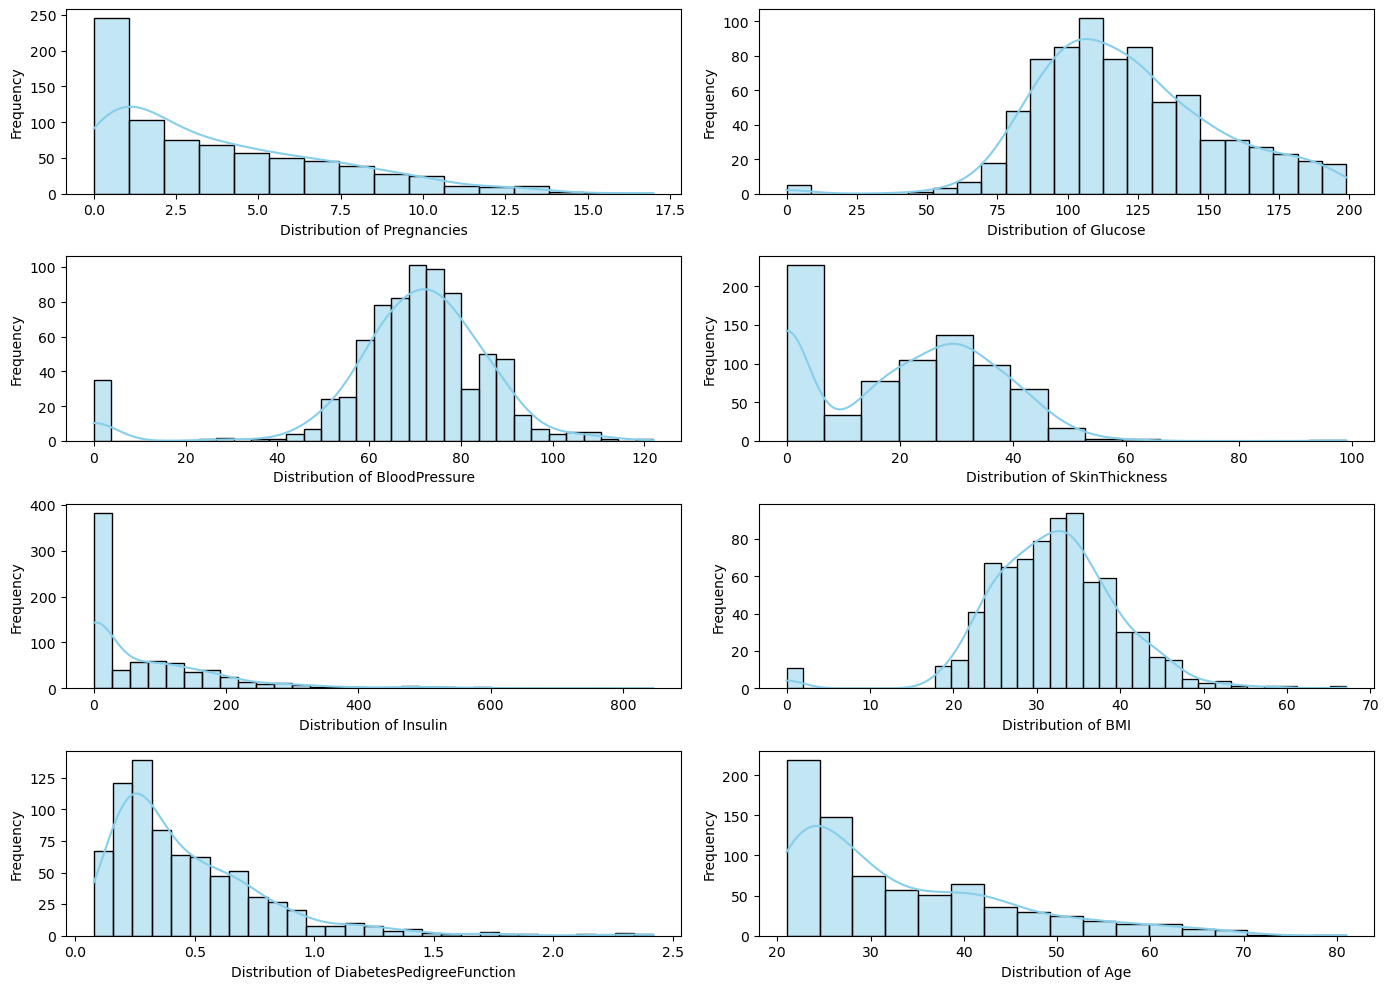

In [64]:
# Plot the distribution of each predictor variable
plt.figure(figsize=(14, 10))

for i, col in enumerate(diabetes_df.columns[:-1]):
    plt.subplot(4, 2, i + 1)
    sns.histplot(diabetes_df[col], kde=True, color='skyblue')
    plt.xlabel(f'Distribution of {col}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

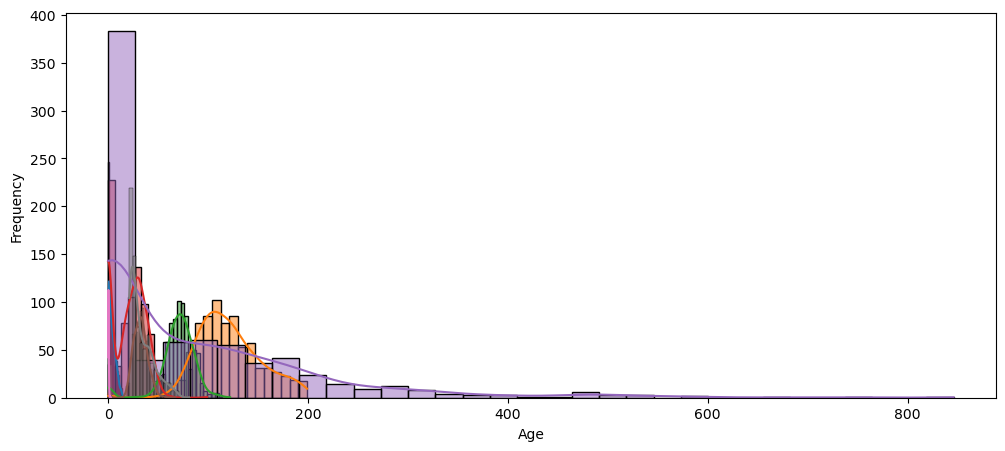

In [65]:
# Plot the distribution of each predictor variable
plt.figure(figsize=(12, 5))

# Create histograms for all predictor variables (excluding the 'Outcome' variable) in and overalapping graphs
for col in diabetes_df.columns[:-1]:
    sns.histplot(diabetes_df[col], kde=True)
    plt.xlabel(col)
plt.ylabel('Frequency')
plt.show()

In [66]:
# Calculate the average age of individuals in the dataset
average_age = diabetes_df['Age'].mean()
print("Average Age of Individuals:", average_age)

Average Age of Individuals: 33.240885416666664


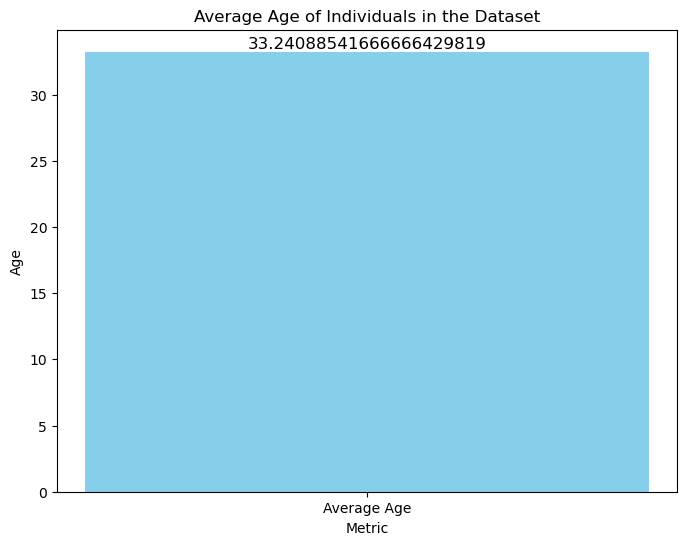

In [67]:
# Calculate the average age of individuals in the dataset
average_age = diabetes_df['Age'].mean()

# Create a bar plot to visualize the average age with a numerical value
plt.figure(figsize=(8, 6))
plt.bar("Average Age", average_age, color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Age')
plt.title('Average Age of Individuals in the Dataset')

# Display the numerical value on the bar with up to 20 decimal places
plt.text("Average Age", average_age, f'{average_age:.20f}', ha='center', va='bottom', fontsize=12)

plt.show()

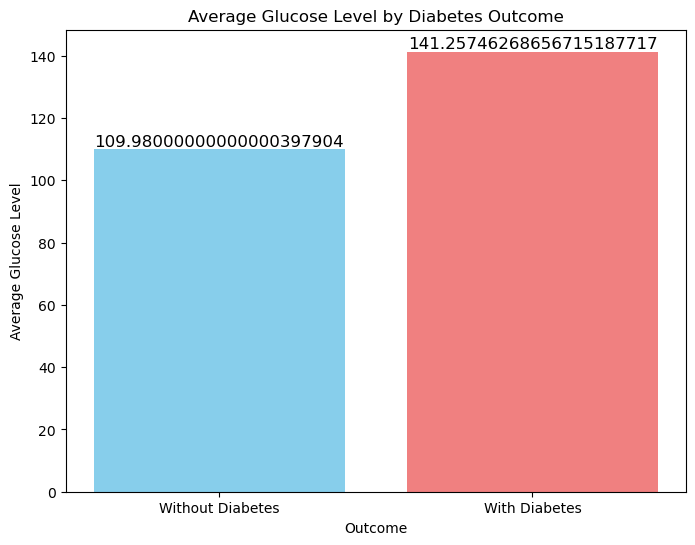

In [68]:
import matplotlib.pyplot as plt

# Calculate the average glucose level for individuals with and without diabetes
average_glucose_by_outcome = diabetes_df.groupby('Outcome')['Glucose'].mean()

# Create a bar plot to visualize the average glucose levels with numerical values
plt.figure(figsize=(8, 6))
bars = plt.bar(["Without Diabetes", "With Diabetes"], average_glucose_by_outcome, color=['skyblue', 'lightcoral'])

# Display numerical values on the bars with up to 20 decimal places
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.20f}', ha='center', va='bottom', fontsize=12)

plt.xlabel('Outcome')
plt.ylabel('Average Glucose Level')
plt.title('Average Glucose Level by Diabetes Outcome')
plt.show()

Average BMI for Individuals without Diabetes: 30.30420000000000158025
Average BMI for Individuals with Diabetes: 35.14253731343283959632


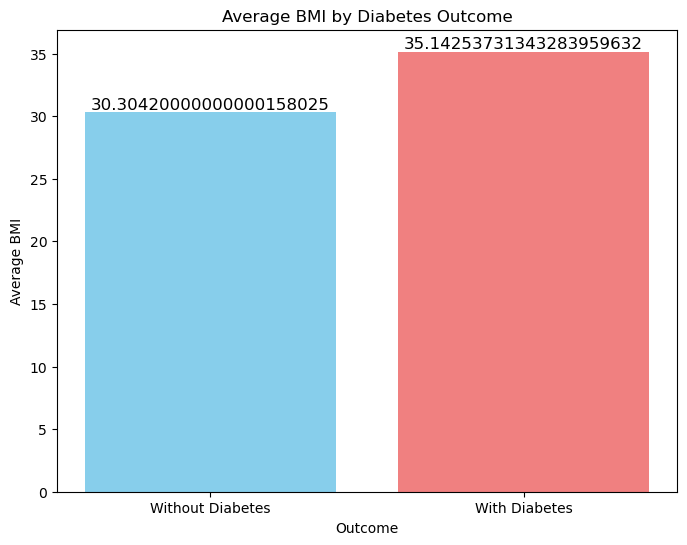

In [69]:
# Calculate the average BMI for individuals with and without diabetes
average_bmi_by_outcome = diabetes_df.groupby('Outcome')['BMI'].mean()

# Print the results
print(f"Average BMI for Individuals without Diabetes: {average_bmi_by_outcome[0]:.20f}")
print(f"Average BMI for Individuals with Diabetes: {average_bmi_by_outcome[1]:.20f}")

# Create a bar plot to visualize the average BMI levels with numerical values
plt.figure(figsize=(8, 6))
bars = plt.bar(["Without Diabetes", "With Diabetes"], average_bmi_by_outcome, color=['skyblue', 'lightcoral'])

# Display numerical values on the bars with up to 20 decimal places
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.20f}', ha='center', va='bottom', fontsize=12)

plt.xlabel('Outcome')
plt.ylabel('Average BMI')
plt.title('Average BMI by Diabetes Outcome')
plt.show()

##### Based on the computed results, it is apparent that individuals with diabetes tend to have higher average levels of glucose and BMI compared to those without diabetes. This observation aligns with our understanding that diabetes is characterized by elevated blood sugar levels. Although the specific type of diabetes (type 1 or type 2) is not confirmed in the dataset, we can make an assumption based on the relationship to BMI.

In the case of type 2 diabetes, which is often associated with obesity, a sedentary lifestyle, and aging, there is a link between higher BMI and an increased likelihood of developing this type of diabetes. This occurs when the body becomes less effective at using the insulin it produces, resulting in the accumulation of glucose in the bloodstream and elevated blood sugar levels. The higher-than-normal BMI, a measure that considers a person's weight in relation to their height, has been associated with an augmented risk of being diagnosed with type 2 diabetes (source: [National Center for Biotechnology Information](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4457375/#:~:text=Mean%20(standard%20deviation).,a%20DM%20diagnosis%20than%20men.)).

#### Boxploting

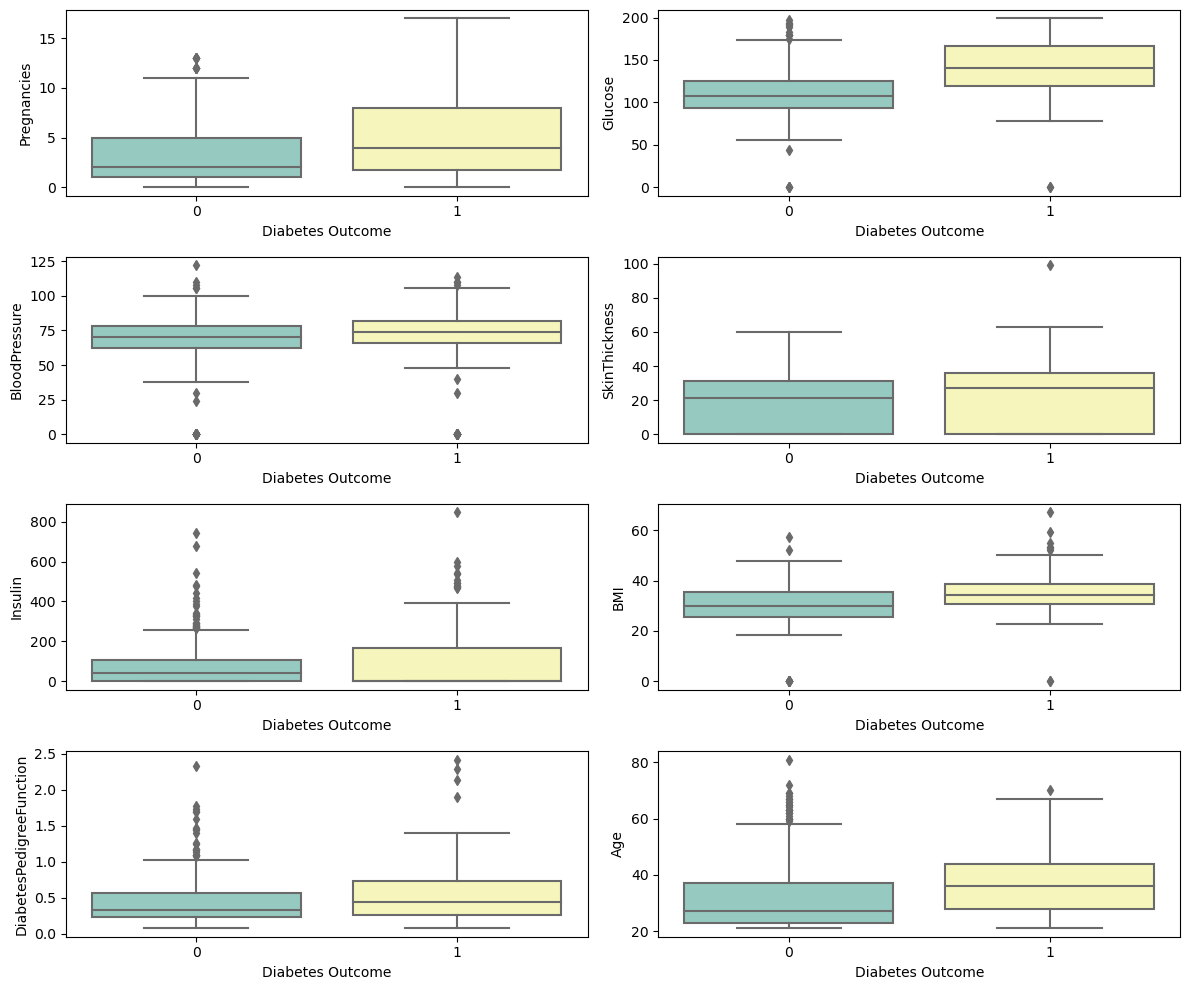

In [70]:
# Generate box plots for each predictor variable to detect outliers
plt.figure(figsize=(12, 10))

for i, column in enumerate(diabetes_df.columns[:-1]):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x='Outcome', y=column, data=diabetes_df, palette='Set3')
    plt.xlabel('Diabetes Outcome')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [71]:
# Generate a summary statistical description of the dataset with transposed output for better readability
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


##### After analyzing the boxplots and reviewing the descriptive statistics, several issues become apparent. These include the presence of outliers, an imbalance in the data, and potentially incorrect results. Notably, having glucose levels, blood pressure, skin thickness, insulin, and BMI values equal to 0 doesn't align with a realistic scenario.

##### Additionally, a preliminary examination of the 'diabetes_df' dataset suggests that the data may not be appropriately scaled.

## Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [72]:
# Print the dimensions (number of rows and columns) of the dataset
print('Number of Rows and Columns:', diabetes_df.shape, '\n')

Number of Rows and Columns: (768, 9) 



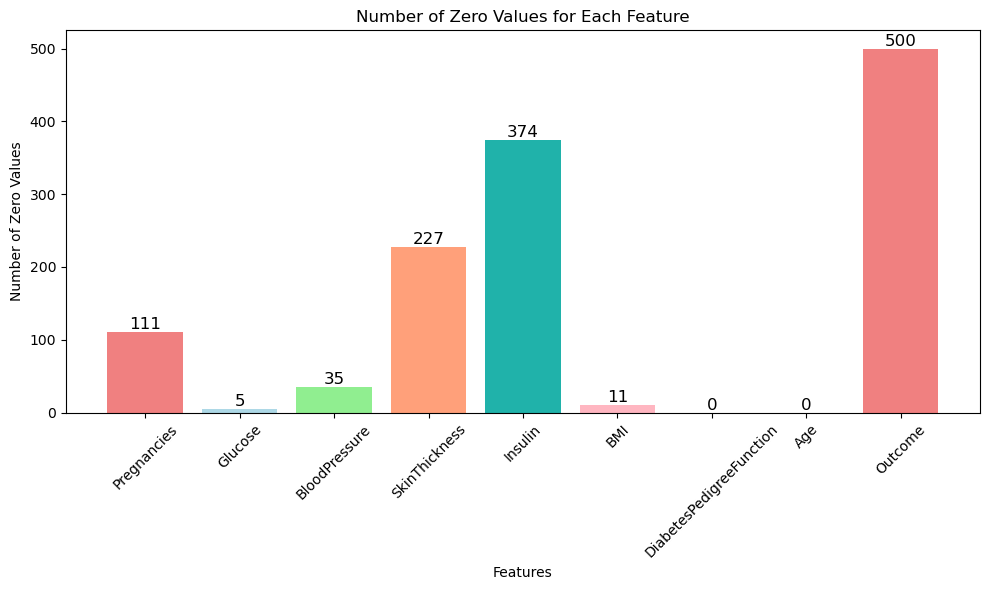

In [73]:
# Count the occurrences of zero values for each feature
zero_value_counts = (diabetes_df == 0).sum()

# Define custom colors for the bars
colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightsalmon', 'lightseagreen', 'lightpink', 'lightsteelblue', 'lightyellow']

# Create a bar plot to visualize the number of zero values with colors and numerical values
plt.figure(figsize=(10, 6))
bars = plt.bar(zero_value_counts.index, zero_value_counts, color=colors)

# Display numerical values on the bars with up to 20 decimal places
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.0f}', ha='center', va='bottom', fontsize=12)

plt.xlabel('Features')
plt.ylabel('Number of Zero Values')
plt.title('Number of Zero Values for Each Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Excluding 'Pregnancies' and 'Outcome,' which can naturally have a value of 0, the analysis reveals the following:

- 'Glucose' exhibits 5 zero-value rows.
- 'BloodPressure' records 35 zero-value rows.
- 'SkinThickness' displays 227 zero-value rows.
- 'Insulin' indicates 374 zero-value rows.
- 'BMI' has 11 zero-value rows.

##### For 'Glucose,' 'BloodPressure,' and 'BMI,' where the zero values account for a small proportion of the total data (e.g., 768 rows), it's appropriate to handle them by removing the corresponding records. Conversely, in the case of 'SkinThickness' and 'Insulin,' where the zero values represent approximately 30% and 49% of the total data, respectively, it is more meaningful to replace the zero values with the median value.

In [74]:
# Create a copy of the original dataset for data cleaning
diabetes_clean_df = diabetes_df.copy()

In [75]:
# Remove rows where 'Glucose', 'BloodPressure', or 'BMI' have zero values
diabetes_clean_df = diabetes_clean_df[(diabetes_clean_df['Glucose'] != 0) &
                                      (diabetes_clean_df['BloodPressure'] != 0) &
                                      (diabetes_clean_df['BMI'] != 0)]

# Reset the index after removing rows
diabetes_clean_df.reset_index(drop=True, inplace=True)

In [76]:
# Count the occurrences of zero values for each feature in the cleaned dataset
zero_value_counts_cleaned = (diabetes_clean_df == 0).sum()

# Print the results
print(f"Number of Zero Values for Each Feature in the cleaned dataset:\n{zero_value_counts_cleaned}")

Number of Zero Values for Each Feature in the cleaned dataset:
Pregnancies                  99
Glucose                       0
BloodPressure                 0
SkinThickness               192
Insulin                     332
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     475
dtype: int64


##### It can be observed that dropping zero-value records for 'SkinThickness' and 'Insulin' would not be a practical approach, as it would involve removing a significant portion of our data.

##### When dealing with zero values that could potentially be outliers or data artifacts, replacing them with the median is often a better choice than the mean. The median is a robust statistic that is less sensitive to extreme values or outliers, making it a more reliable option for handling such cases. This approach allows us to retain the data while mitigating the impact of potentially erroneous zero values.

In [77]:
# Replace zero values with the median for 'SkinThickness' and 'Insulin' in the cleaned dataset
diabetes_clean_df['SkinThickness'].replace(0, diabetes_clean_df['SkinThickness'].median(), inplace=True)
diabetes_clean_df['Insulin'].replace(0, diabetes_clean_df['Insulin'].median(), inplace=True)

Number of Zero Values for Each Feature in the cleaned dataset:
Pregnancies                  99
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     475
dtype: int64


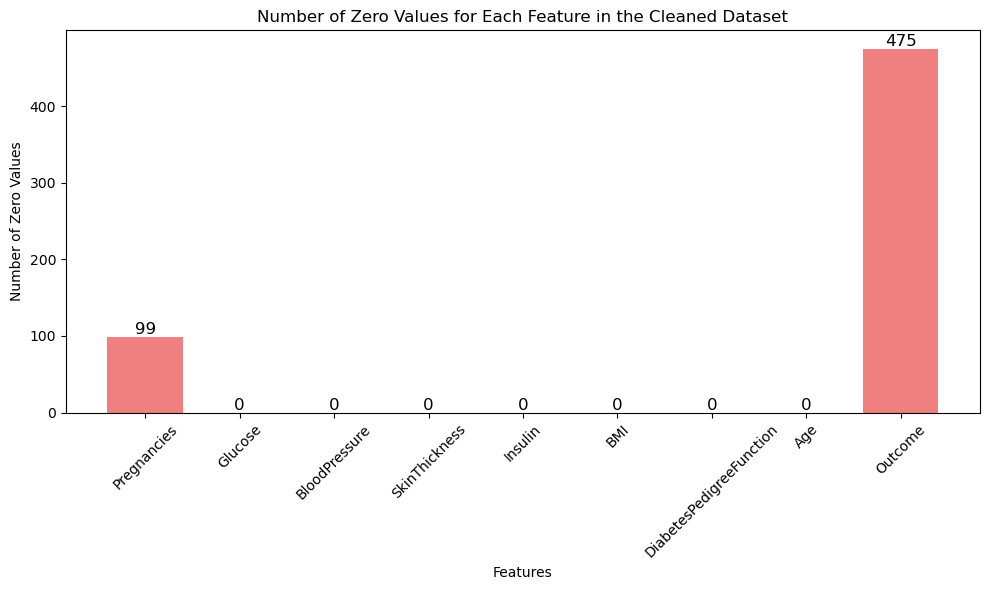

In [78]:
# Count the occurrences of zero values for each feature in the cleaned dataset
zero_value_counts_cleaned = (diabetes_clean_df == 0).sum()

# Print the results
print(f"Number of Zero Values for Each Feature in the cleaned dataset:\n{zero_value_counts_cleaned}")

# Create a bar plot to visualize the number of zero values with colors and numerical values
plt.figure(figsize=(10, 6))
colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightsalmon', 'lightseagreen', 'lightpink', 'lightsteelblue', 'lightyellow']
bars = plt.bar(zero_value_counts_cleaned.index, zero_value_counts_cleaned, color=colors)

# Display numerical values on the bars with up to 20 decimal places
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.0f}', ha='center', va='bottom', fontsize=12)

plt.xlabel('Features')
plt.ylabel('Number of Zero Values')
plt.title('Number of Zero Values for Each Feature in the Cleaned Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Summary of the Cleaned Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    int64  
 1   Glucose                   724 non-null    int64  
 2   BloodPressure             724 non-null    int64  
 3   SkinThickness             724 non-null    int64  
 4   Insulin                   724 non-null    int64  
 5   BMI                       724 non-null    float64
 6   DiabetesPedigreeFunction  724 non-null    float64
 7   Age                       724 non-null    int64  
 8   Outcome                   724 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 51.0 KB


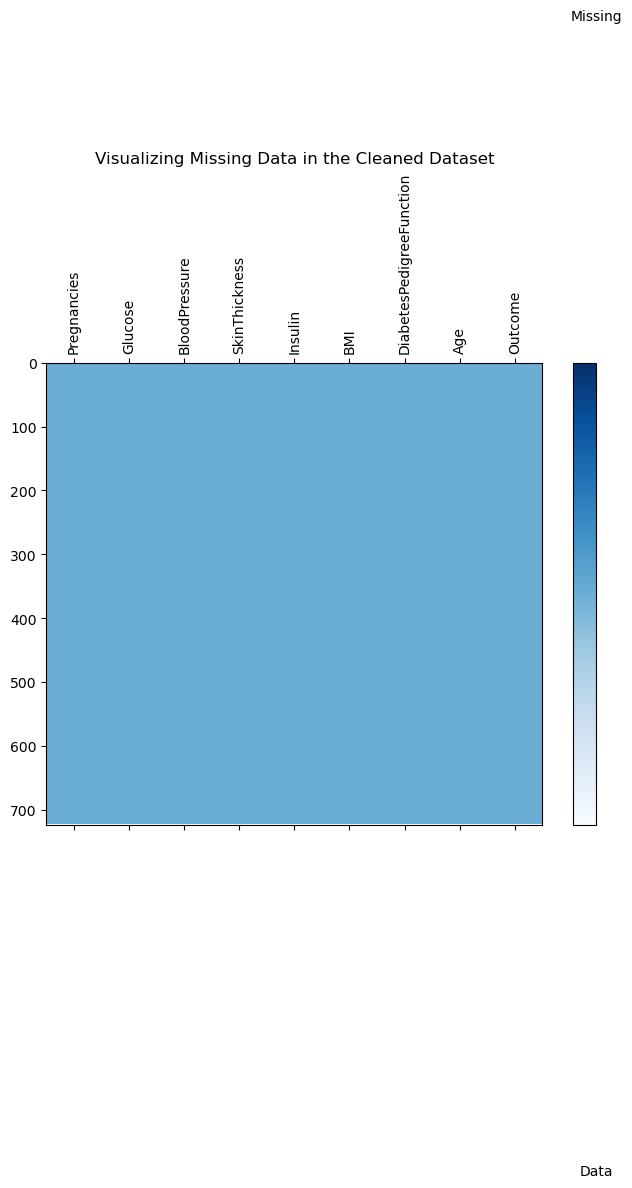

In [79]:
# Display information about the cleaned dataset
print("Summary of the Cleaned Dataset:")
diabetes_clean_df.info()

# Create a colored table for better visualization
plt.figure(figsize=(8, 6))
ax = plt.gca().matshow(diabetes_clean_df.isnull(), cmap='Blues', aspect='auto')

# Add color legend
cax = plt.colorbar(ax)
cax.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['Data', 'Missing']):
    cax.ax.text(1, (j - 0.5) / 2.0, lab, ha='center', va='center')
plt.xticks(range(len(diabetes_clean_df.columns)), diabetes_clean_df.columns, rotation='vertical')
plt.title('Visualizing Missing Data in the Cleaned Dataset')
plt.show()

### Re-examine the data in the following steps

#### Correlation matrix with all variables

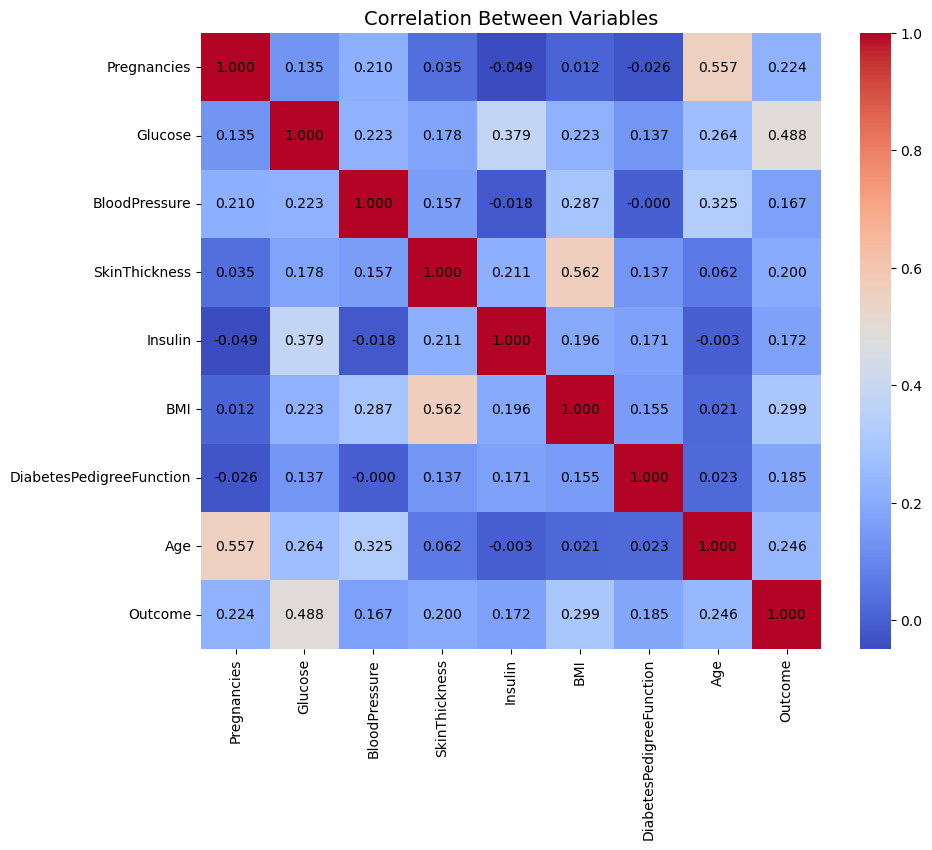

In [80]:
# Calculate the correlation matrix for the variables in the cleaned dataset
correlation_matrix = diabetes_clean_df.corr()

# Create a heatmap to visualize the correlations with color-coded values
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Between Variables', fontsize=14)

# Display the correlation values in each cell
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        correlation_value = "{:.3f}".format(correlation_matrix.iloc[i, j])
        heatmap.text(j + 0.5, i + 0.5, correlation_value, ha='center', va='center', fontsize=10)

plt.show()

##### Analysis of the (Modified) Data Reveals the Following Insights:
- Similar to the previous observation, 'pregnancies' maintains a moderate positive correlation with 'age,' indicating that age plays a role in the number of pregnancies, although the exact nature of this relationship remains inconclusive.
- Notably, there is now a moderate positive correlation between 'BMI' and 'SkinThickness.' This correlation aligns with the idea that [skin thickness can increase with BMI](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3897752/#:~:text=In%20both%20children%20and%20adults,BMI%20(p%3C0.0001).).
- Apart from these relationships, the correlations between predictor variables generally exhibit either weak or very weak associations.

##### Note: In this correlation matrix, we have also introduced the target variable 'Outcome,' which will be utilized in the subsequent feature engineering steps. The interpretation of its correlation with predictor variables follows a similar pattern.

In [81]:
# Calculate the correlation of the target variable 'Outcome' with predictor variables and sort in descending order
correlation_with_outcome = diabetes_clean_df.corr()['Outcome'].sort_values(ascending=False)

# Display the sorted correlation values
print("Correlation with Outcome (Descending Order):\n", correlation_with_outcome)

Correlation with Outcome (Descending Order):
 Outcome                     1.000000
Glucose                     0.488384
BMI                         0.299375
Age                         0.245741
Pregnancies                 0.224417
SkinThickness               0.200386
DiabetesPedigreeFunction    0.184947
Insulin                     0.172373
BloodPressure               0.166703
Name: Outcome, dtype: float64


### Scaling the Data

In [82]:
# Import the necessary libraries for data scaling and train-test splitting
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

###### When it comes to scaling the data, we have a couple of options, such as 'StandardScaler' and 'MinMaxScaler.' 'StandardScaler' is effective but sensitive to outliers, while 'MinMaxScaler' maintains the relationships between the original data points. In this scenario, since we've already "cleaned" the data to handle outliers, we'll opt for 'StandardScaler.'

In [83]:
# Select the appropriate features and target variable
X = diabetes_clean_df.drop('Outcome', axis=1)  # Features (predictor variables)
y = diabetes_clean_df['Outcome']  # Target variable (dependent variable)

Training Data (X_train): (579, 8)
Testing Data (X_test): (145, 8)
Training Target (y_train): (579,)
Testing Target (y_test): (145,)


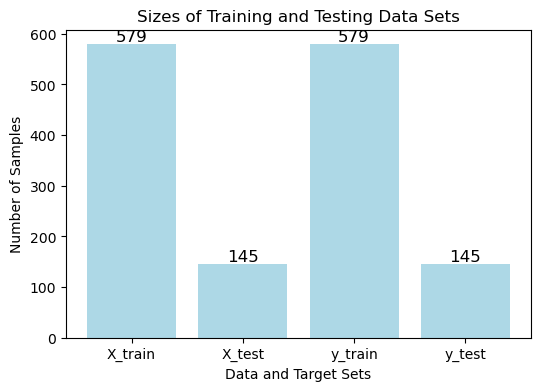

In [84]:
# Split the data into training and testing sets before applying data scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the dimensions of the training and testing sets
print("Training Data (X_train):", X_train.shape)
print("Testing Data (X_test):", X_test.shape)
print("Training Target (y_train):", y_train.shape)
print("Testing Target (y_test):", y_test.shape)

# Create a bar chart to visualize the sizes of training and testing sets with numerical values
plt.figure(figsize=(6, 4))
bar_labels = ['X_train', 'X_test', 'y_train', 'y_test']
data_sizes = [X_train.shape[0], X_test.shape[0], y_train.shape[0], y_test.shape[0]]

for i, size in enumerate(data_sizes):
    plt.text(i, size, str(size), ha='center', va='bottom', fontsize=12)

bars = plt.bar(bar_labels, data_sizes, color='lightblue')
plt.xlabel('Data and Target Sets')
plt.ylabel('Number of Samples')
plt.title('Sizes of Training and Testing Data Sets')
plt.show()

Predictor Variable Columns: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
Scaled Training Data Dimensions (rows, columns): (579, 8)


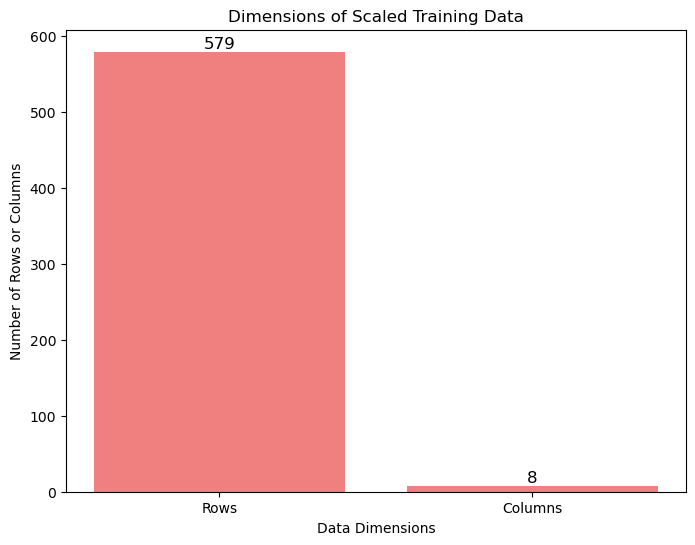

In [85]:
# Print the column names of the predictor variables
print("Predictor Variable Columns:", X_train.columns)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected columns in the training data
X_train_scaled = scaler.fit_transform(X_train)

# Print the dimensions of the scaled training data
print("Scaled Training Data Dimensions (rows, columns):", X_train_scaled.shape)

# Create a bar chart to visualize the dimensions of the scaled training data
plt.figure(figsize=(8, 6))
bar_labels = ['Rows', 'Columns']
data_dimensions = [X_train_scaled.shape[0], X_train_scaled.shape[1]]

for i, dimension in enumerate(data_dimensions):
    plt.text(i, dimension, str(dimension), ha='center', va='bottom', fontsize=12)

bars = plt.bar(bar_labels, data_dimensions, color='lightcoral')
plt.xlabel('Data Dimensions')
plt.ylabel('Number of Rows or Columns')
plt.title('Dimensions of Scaled Training Data')
plt.show()

Predictor Variable Columns (Test Set): Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
Scaled Test Data Dimensions (rows, columns): (145, 8)


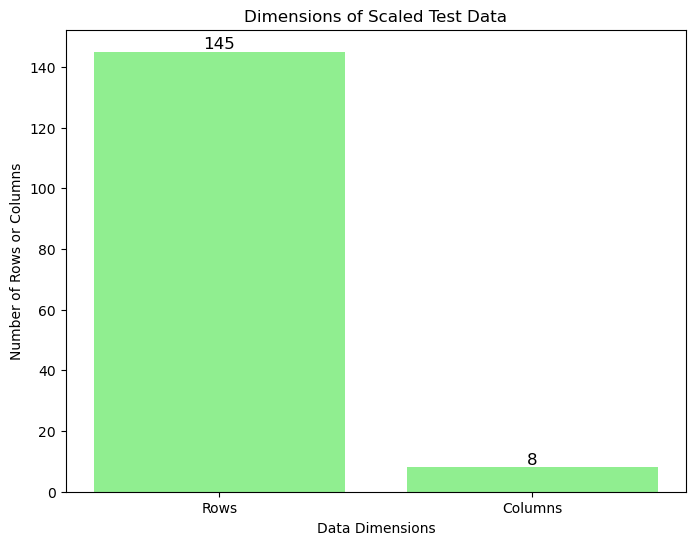

In [86]:
# Print the column names of the predictor variables in the test set
print("Predictor Variable Columns (Test Set):", X_test.columns)

# Scale the selected columns in the test data without re-fitting the scaler to avoid data leakage
X_test_scaled = scaler.transform(X_test)

# Print the dimensions of the scaled test data
print("Scaled Test Data Dimensions (rows, columns):", X_test_scaled.shape)

# Create a bar chart to visualize the dimensions of the scaled test data
plt.figure(figsize=(8, 6))
bar_labels = ['Rows', 'Columns']
data_dimensions = [X_test_scaled.shape[0], X_test_scaled.shape[1]]

for i, dimension in enumerate(data_dimensions):
    plt.text(i, dimension, str(dimension), ha='center', va='bottom', fontsize=12)

bars = plt.bar(bar_labels, data_dimensions, color='lightgreen')
plt.xlabel('Data Dimensions')
plt.ylabel('Number of Rows or Columns')
plt.title('Dimensions of Scaled Test Data')
plt.show()

### Selecting Relevant Features

##### The feature selection process offers several approaches, including the creation of new features or the modification of existing ones to enhance model performance. For instance, we could categorize 'Age' and 'BMI' into labeled bins, differentiating between young, middle-aged, or senior individuals and those who are underweight, normal, overweight, or obese.

##### However, for simplicity, in this case, we will opt for selecting the three most highly correlated predictor variables based on the correlation matrix.

Scaled Training Data (X_train_scaled):
 [[-1.15305694  0.49317045  0.93754177 ... -0.7335971  -0.71653187
   2.17021882]
 [-0.25892305 -1.43288372 -1.78464809 ... -0.20467539 -0.66631883
  -0.63118444]
 [-0.85501231 -1.30230378 -0.66374638 ... -1.60560315 -0.17304955
  -0.88585746]
 ...
 [ 0.3371662   1.0807802   0.93754177 ...  0.89605356  0.42950693
   0.04794363]
 [ 0.3371662  -1.10643386  0.45715532 ... -0.69071155 -0.63678175
   0.30261665]
 [-0.25892305  1.60309998 -0.02323112 ...  0.12411378 -0.81105054
  -0.80096645]] 

Scaled Test Data (X_test_scaled):
 [[-0.85501231  0.55846043 -2.10490572 ... -0.53346456  0.53288672
  -0.97074847]
 [-0.85501231 -1.10643386 -0.8238752  ... -0.36192239 -0.1523736
  -0.88585746]
 [ 2.12543397 -0.35559918  0.93754177 ...  2.05396324  1.33334166
   0.98174471]
 ...
 [ 0.63521083  0.49317045 -0.90393961 ... -1.17674772 -0.95282854
   1.83065479]
 [ 1.82738934  0.8522653   0.93754177 ...  0.73880657  1.55782349
   1.49109076]
 [ 0.03912157  1.04813

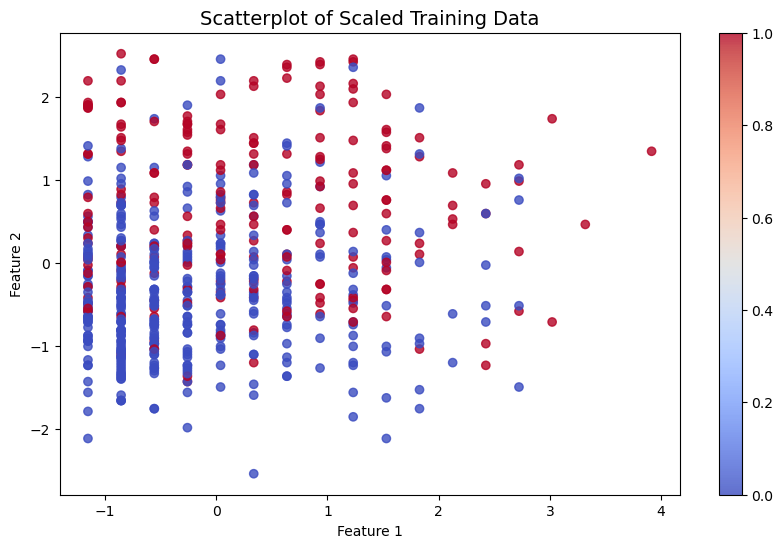

In [87]:
# Print the scaled training and test data
print('Scaled Training Data (X_train_scaled):\n', X_train_scaled, '\n')
print('Scaled Test Data (X_test_scaled):\n', X_test_scaled)

# Create a scatterplot to visualize the scaled training data
plt.figure(figsize=(10, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='coolwarm', alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatterplot of Scaled Training Data', fontsize=14)
plt.colorbar()
plt.show()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.153057,0.493170,0.937542,-0.101757,-0.565753,-0.733597,-0.716532,2.170219
1,-0.258923,-1.432884,-1.784648,0.423351,-0.183780,-0.204675,-0.666319,-0.631184
2,-0.855012,-1.302304,-0.663746,-1.572059,-0.116934,-1.605603,-0.173050,-0.885857
3,2.721523,-0.584114,-0.023231,-0.416821,-0.565753,-0.176085,-0.025364,0.387508
4,-0.855012,-0.812629,-0.183360,-1.362015,-0.565753,-2.034459,-0.964643,-1.055639


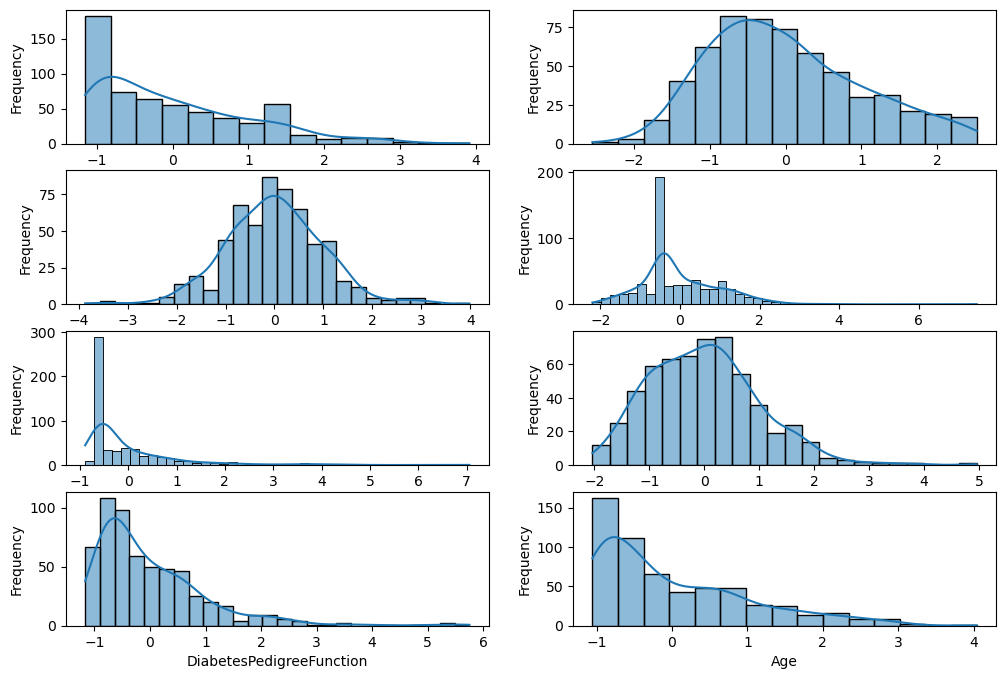

In [88]:
# Create a DataFrame from the scaled training data for better visualization
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Display the first few rows of the scaled training data
display(X_train_scaled_df.head())

# Create a histogram grid to visualize the distribution of scaled predictor variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(X_train_scaled_df.columns):
    plt.subplot(4, 2, i+1)
    sns.histplot(X_train_scaled_df[col], kde=True)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.show()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.855012,0.558460,-2.104906,-0.941929,-0.231526,-0.533465,0.532887,-0.970748
1,-0.855012,-1.106434,-0.823875,-0.416821,-0.603951,-0.361922,-0.152374,-0.885857
2,2.125434,-0.355599,0.937542,1.263524,-0.565753,2.053963,1.333342,0.981745
3,2.125434,0.525815,0.297027,-0.416821,-0.565753,0.109819,-0.158281,0.132835
4,-0.258923,2.321290,-0.183360,0.318330,-0.565753,0.352837,-0.686995,-0.716075


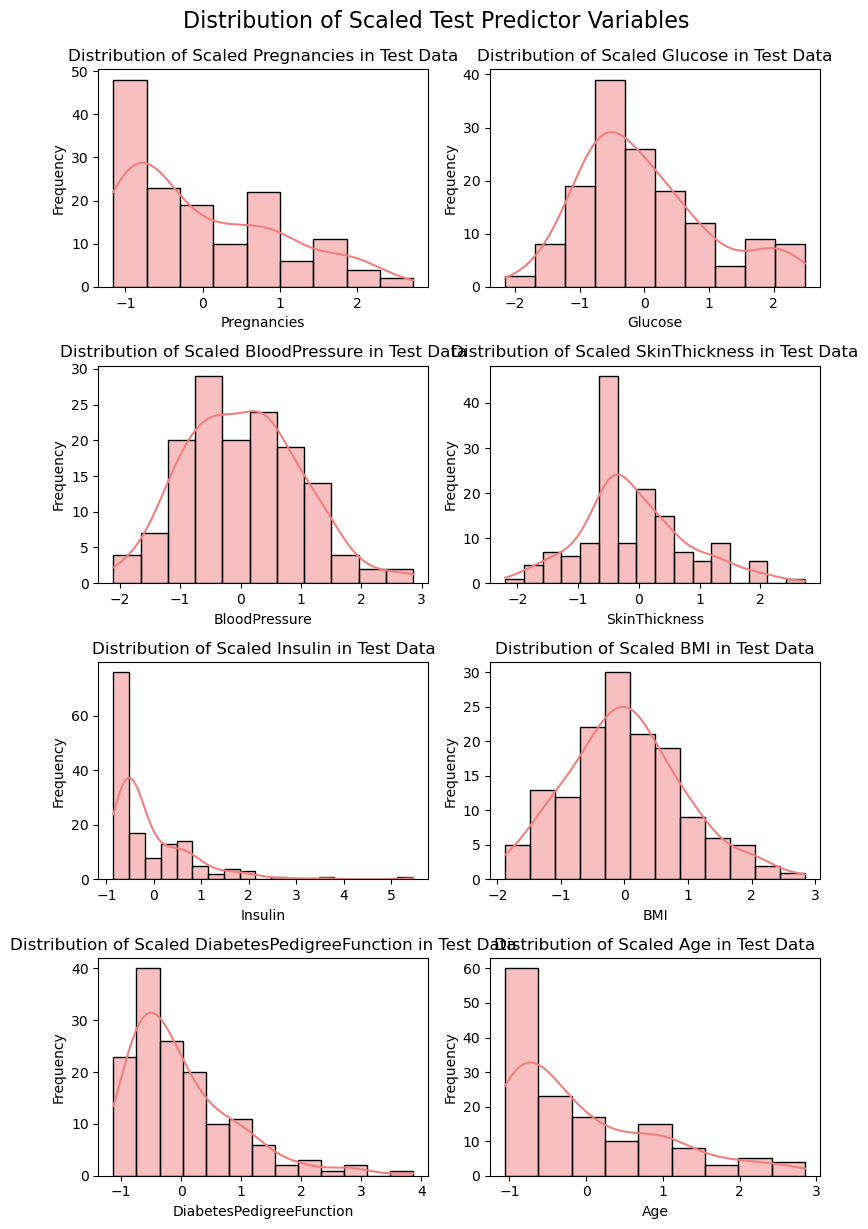

In [89]:
# Create a DataFrame from the scaled test data for better visualization
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the first few rows of the scaled test data
display(X_test_scaled_df.head())

# Create histograms for all the columns
plt.figure(figsize=(8, 12))

for i, col in enumerate(X_test_scaled_df.columns):
    plt.subplot(4, 2, i + 1)
    sns.histplot(X_test_scaled_df[col], kde=True, color='lightcoral')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Scaled {col} in Test Data', fontsize=12)

plt.tight_layout()
plt.suptitle('Distribution of Scaled Test Predictor Variables', y=1.02, fontsize=16)
plt.show()


In [90]:
# Select the top features based on the correlation matrix
selected_features = ['Glucose', 'BMI', 'Age']

# Create subsets of the scaled data with the selected features for both training and testing sets
X_train_selected = X_train_scaled_df[selected_features]
X_test_selected = X_test_scaled_df[selected_features]

X_train_selected: (579, 3)
X_test_selected: (145, 3)


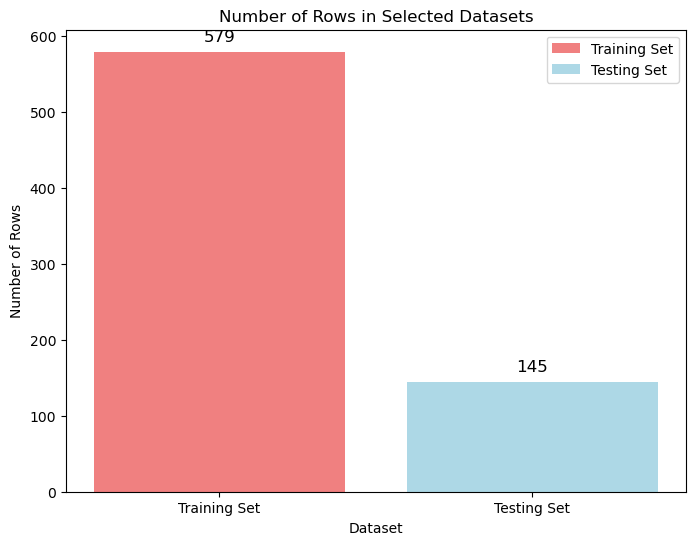

In [91]:
# Print the shape of the selected training and testing sets
print("X_train_selected:", X_train_selected.shape)
print("X_test_selected:", X_test_selected.shape)

# Create a bar chart to visualize the shapes
plt.figure(figsize=(8, 6))
plt.bar("Training Set", X_train_selected.shape[0], color='lightcoral', label='Training Set')
plt.bar("Testing Set", X_test_selected.shape[0], color='lightblue', label='Testing Set')
plt.xlabel('Dataset')
plt.ylabel('Number of Rows')
plt.title('Number of Rows in Selected Datasets')

# Display numerical values on the bars
plt.text(0, X_train_selected.shape[0] + 10, str(X_train_selected.shape[0]), ha='center', va='bottom', fontsize=12)
plt.text(1, X_test_selected.shape[0] + 10, str(X_test_selected.shape[0]), ha='center', va='bottom', fontsize=12)

plt.legend()
plt.show()

## Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

### Logistic Regression Model

In [92]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [93]:
# Initialize a Logistic Regression model
logistic_regression_model = LogisticRegression()

# Train the Logistic Regression model on the selected training data and labels
logistic_regression_model.fit(X_train_selected, y_train)

LogisticRegression()

In [94]:
# Use the trained Logistic Regression model to make predictions on the test set
logistic_regression_predictions = logistic_regression_model.predict(X_test_selected)

Accuracy:  0.8068965517241379
Precision:  0.7027027027027027
Recall:  0.6046511627906976
F1-Score:  0.6499999999999999
ROC-AUC:  0.7484040127678978


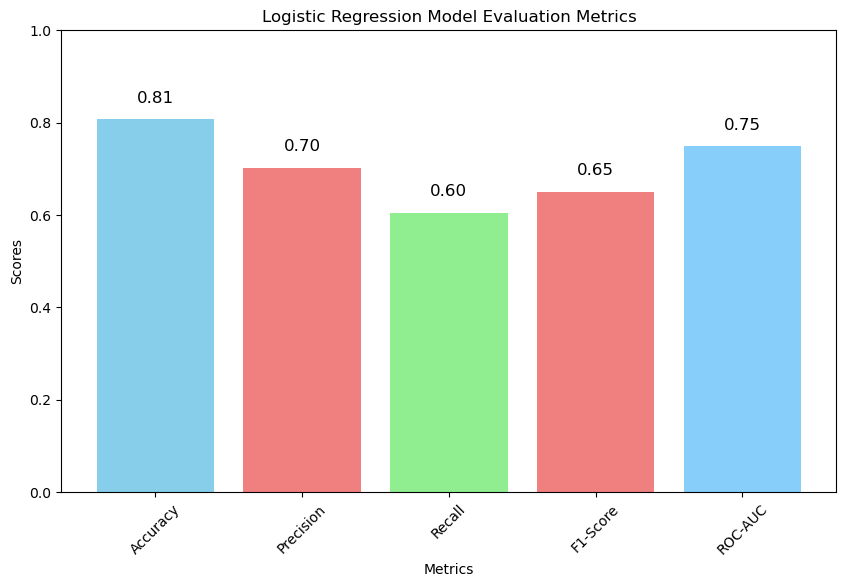

In [112]:
# Evaluate the Logistic Regression model
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
logistic_regression_precision = precision_score(y_test, logistic_regression_predictions)
logistic_regression_recall = recall_score(y_test, logistic_regression_predictions)
logistic_regression_f1_score = f1_score(y_test, logistic_regression_predictions)
logistic_regression_roc_auc = roc_auc_score(y_test, logistic_regression_predictions)

# Print the evaluation metrics
print("Accuracy: ", logistic_regression_accuracy)
print("Precision: ", logistic_regression_precision)
print("Recall: ", logistic_regression_recall)
print("F1-Score: ", logistic_regression_f1_score)
print("ROC-AUC: ", logistic_regression_roc_auc)

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, logistic_regression_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Logistic Regression Model Evaluation Metrics')
plt.ylim(0, 1)  # Set the y-axis limits to represent scores between 0 and 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add numerical values on top of the bars
for bar, score in zip(bars, logistic_regression_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, score + 0.03, f'{score:.2f}', ha='center', va='bottom', fontsize=12)

plt.show()

### Support Vector Machine (SVM) Modeling

In [103]:
from sklearn.svm import SVC

In [104]:
# initialize and train support vector machine (SVM) model
svm_model = SVC()
svm_model.fit(X_train_selected, y_train)

SVC()

In [105]:
# predict on the test set
svm_pred = svm_model.predict(X_test_selected)

Accuracy:  0.8137931034482758
Precision:  0.7
Recall:  0.6511627906976745
F1-Score:  0.674698795180723
ROC-AUC:  0.7667578659370724


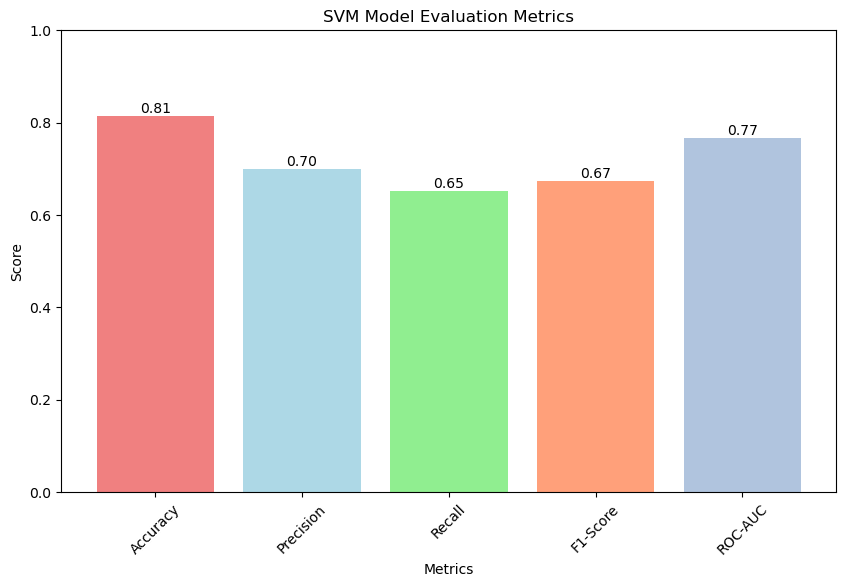

In [110]:
# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1_score = f1_score(y_test, svm_pred)
svm_roc_auc = roc_auc_score(y_test, svm_pred)

# Print the evaluation metrics
print("Accuracy: ", svm_accuracy)
print("Precision: ", svm_precision)
print("Recall: ", svm_recall)
print("F1-Score: ", svm_f1_score)
print("ROC-AUC: ", svm_roc_auc)

# Create a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, svm_scores, color=['lightcoral', 'lightblue', 'lightgreen', 'lightsalmon', 'lightsteelblue'])
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("SVM Model Evaluation Metrics")
plt.ylim(0, 1)  # Set the y-axis limits
plt.xticks(rotation=45)  # Rotate metric names for readability

# Add numerical values on top of the bars
for bar, score in zip(bars, svm_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, score, f"{score:.2f}", ha='center', va='bottom')

plt.show()

### Random Forest Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
# initialize and train random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [115]:
# predict on the test set
rf_pred = rf_model.predict(X_test_selected)

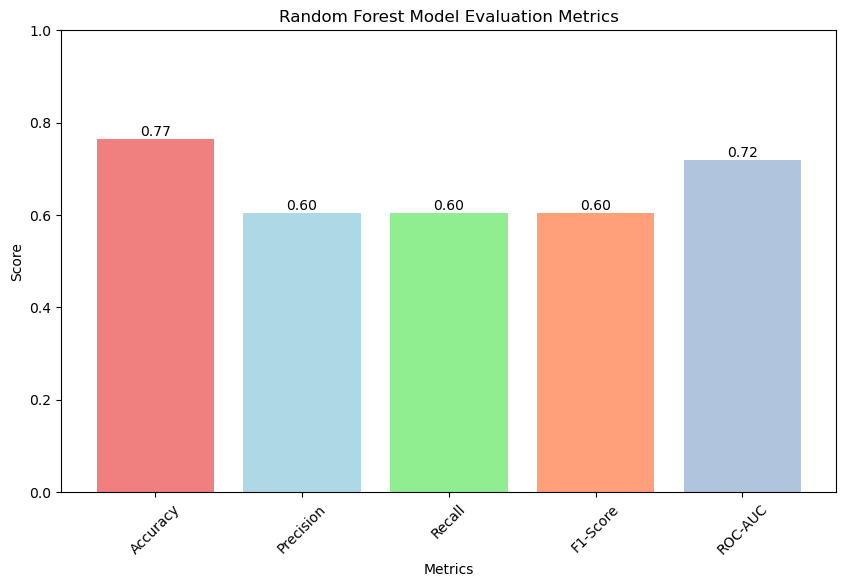

In [119]:
# Evaluation metrics
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
rf_scores = [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc]

# Create a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, rf_scores, color=['lightcoral', 'lightblue', 'lightgreen', 'lightsalmon', 'lightsteelblue'])
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Random Forest Model Evaluation Metrics")
plt.ylim(0, 1)  # Set the y-axis limits
plt.xticks(rotation=45)  # Rotate metric names for readability

# Add numerical values on top of the bars
for bar, score in zip(bars, rf_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, score, f"{score:.2f}", ha='center', va='bottom')

plt.show()


#### Visualizations

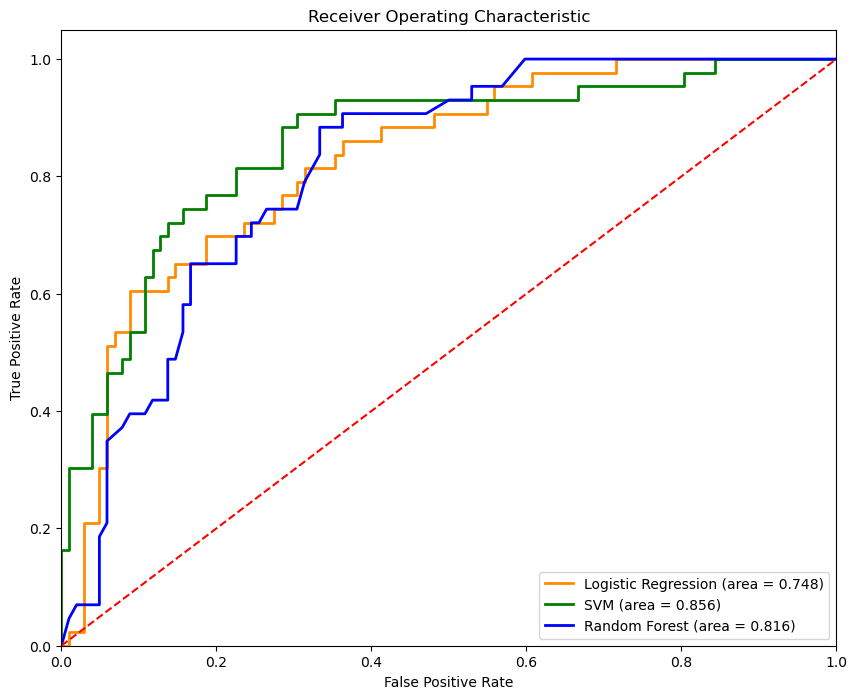

In [123]:
# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_selected, y_train)

# Initialize and train the Support Vector Machine (SVM) model
svm_model = SVC(probability=True)
svm_model.fit(X_train_selected, y_train)

# Initialize and train the Random Forest Classifier (RFC) model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_selected, y_train)

# Predict on the test set using each model
logreg_pred = logreg_model.predict(X_test_selected)
svm_pred = svm_model.predict(X_test_selected)
rf_pred = rf_model.predict(X_test_selected)

# Model evaluation for Logistic Regression
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_precision = precision_score(y_test, logreg_pred)
logreg_recall = recall_score(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred)
logreg_roc_auc = roc_auc_score(y_test, logreg_pred)

# Model evaluation for SVM
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
svm_probs = svm_model.decision_function(X_test_selected)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_roc_auc = roc_auc_score(y_test, svm_probs)

# Model evaluation for Random Forest Classifier
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_probs = rf_model.predict_proba(X_test_selected)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_roc_auc = roc_auc_score(y_test, rf_probs)

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
plt.plot(logreg_fpr, logreg_tpr, color='darkorange', lw=2, label='Logistic Regression (area = %0.3f)' % logreg_roc_auc)
plt.plot(svm_fpr, svm_tpr, color='green', lw=2, label='SVM (area = %0.3f)' % svm_roc_auc)
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label='Random Forest (area = %0.3f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


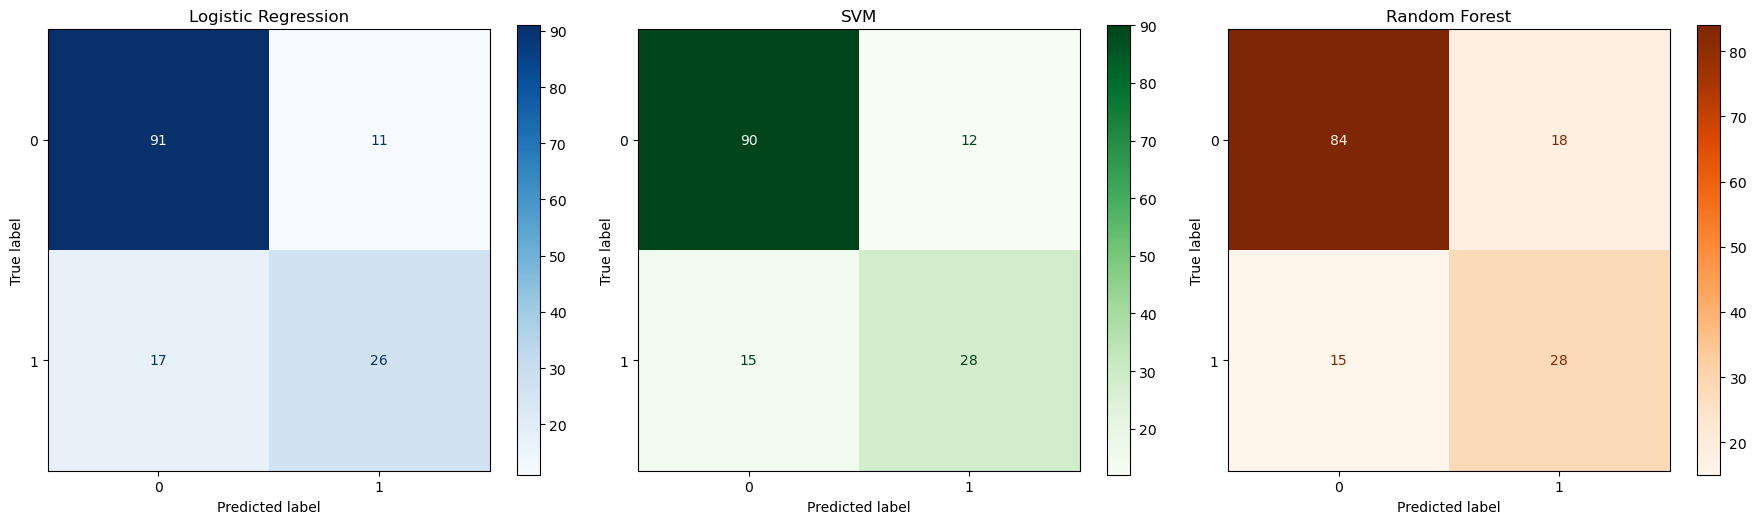

In [130]:
# Create subplots for each model
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot confusion matrix for Logistic Regression with a specific color map
confusion_lr = confusion_matrix(y_test, logreg_pred, labels=logreg_model.classes_)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=confusion_lr, display_labels=logreg_model.classes_)
disp_lr.plot(cmap='Blues', ax=axs[0])
axs[0].set_title('Logistic Regression')

# Plot confusion matrix for Support Vector Machine with a different color map
confusion_svm = confusion_matrix(y_test, svm_pred, labels=svm_model.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=confusion_svm, display_labels=svm_model.classes_)
disp_svm.plot(cmap='Greens', ax=axs[1])
axs[1].set_title('SVM')

# Plot confusion matrix for Random Forest with yet another color map
confusion_rf = confusion_matrix(y_test, rf_pred, labels=rf_model.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=confusion_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap='Oranges', ax=axs[2])
axs[2].set_title('Random Forest')

plt.tight_layout()
plt.show()

## Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

Certainly, here are the findings based on the analysis:

### Exploratory Data Analysis (EDA):
1. As part of my EDA process, I observed that the data exhibited issues with improper scaling and outliers. These concerns needed to be tackled to ensure robust model development.
2. Additionally, I detected instances of incorrect data within the dataset, potentially impacting the overall model performance.

### Preprocessing and Feature Engineering:
3. In the preprocessing and feature engineering phase, I executed various data scaling techniques and applied strategies to address the outliers and incorrect data points. This was crucial to ensure the dataset's readiness for model training.
4. To boost the model's predictive capabilities, I strategically opted for features showcasing the highest correlations with the target variable. This feature selection approach aimed to enhance the model's accuracy in making predictions.

### Machine Learning Model Training:
5. My model selection encompassed three distinctive machine learning models: Logistic Regression, Support Vector Machine, and Random Forest Classifier. These models were rigorously compared for their performance.
6. In the context of accuracy, it was evident that Logistic Regression outperformed its counterparts, with Support Vector Machine and Random Forest following closely behind.
7. Logistic Regression achieved the highest precision and recall, signifying that a substantial portion of its predictions proved to be correct compared to the other models.
8. Notably, Support Vector Machine excelled in the ROC plot, boasting the highest AUC and indicating its proficiency in distinguishing between positive and negative classes.
9. When examining ROC-AUC values, Support Vector Machine emerged as the most proficient in classification tasks, trailed by Logistic Regression and Random Forest.
10. Logistic Regression and Support Vector Machine exhibited elevated precision and recall when contrasted with Random Forest. This suggested that they effectively balanced identifying true positives while minimizing false positives and negatives.
11. While Random Forest boasted similar precision and recall metrics, it registered a slightly lower overall accuracy compared to the other models.

Given these comprehensive insights, my analysis underscored Support Vector Machine as the prime candidate, showcasing the most promising performance for this specific binary classification task.

It's imperative to note that the relatively underwhelming performance of the Random Forest ensemble model could potentially be attributed to factors including the feature selection assumptions, absence of extensive hyperparameter tuning, unaddressed data imbalances, and the inherent behavior of ensembles, which can impact their predictive capabilities.